In [18]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/retail_sales_dataset.csv')

1. Análisis de correlación 

                     Age  Quantity  Price per Unit  Total Amount
Age             1.000000 -0.023737       -0.038423     -0.060568
Quantity       -0.023737  1.000000        0.017501      0.373707
Price per Unit -0.038423  0.017501        1.000000      0.851925
Total Amount   -0.060568  0.373707        0.851925      1.000000


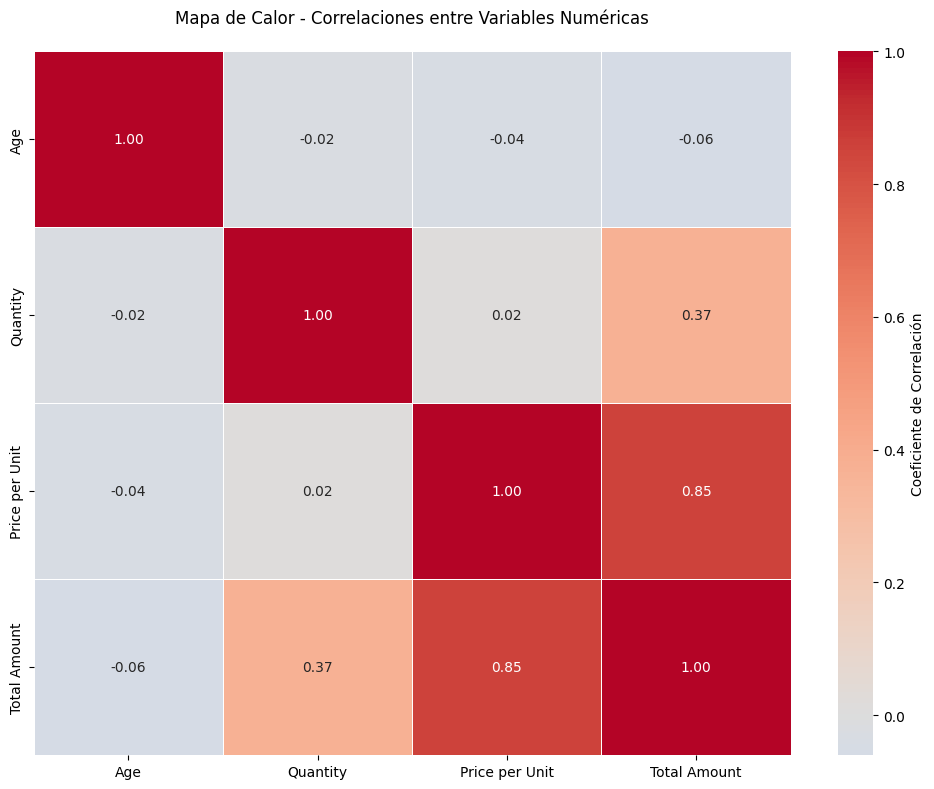

In [19]:
# se seleccionan las variables numericas
var_numericas = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']
matriz_corr = df[var_numericas].corr()
print(matriz_corr)

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, 
            annot=True,  
            cmap='coolwarm', 
            center=0,  
            fmt='.2f',  
            linewidths=0.5, 
            cbar_kws={'label': 'Coeficiente de Correlación'})

plt.title('Mapa de Calor - Correlaciones entre Variables Numéricas', pad=20)
plt.tight_layout()
plt.show()

* La correlación más fuerte es entre 'Price per Unit' y 'Total Amount' (0.85), lo cual es lógico ya que el monto total depende directamente del precio unitario.
* Existe una correlación moderada positiva entre 'Quantity' y 'Total Amount' (0.37), lo que también es esperado ya que la cantidad influye en el monto total, aunque esta correlacion es muy pequenha.
* La edad ('Age') tiene correlaciones muy débiles y negativas con todas las demás variables

Se puede concluir que:
 - El monto total ('Total Amount') está más influenciado por el precio unitario que por la cantidad de productos.
 - La edad del cliente parece no tener una influencia significativa en los patrones de compra (cantidad, precio o monto total).
 - Los precios unitarios y las cantidades compradas son prácticamente independientes entre sí.

2. Subplots y analisis de variables clave

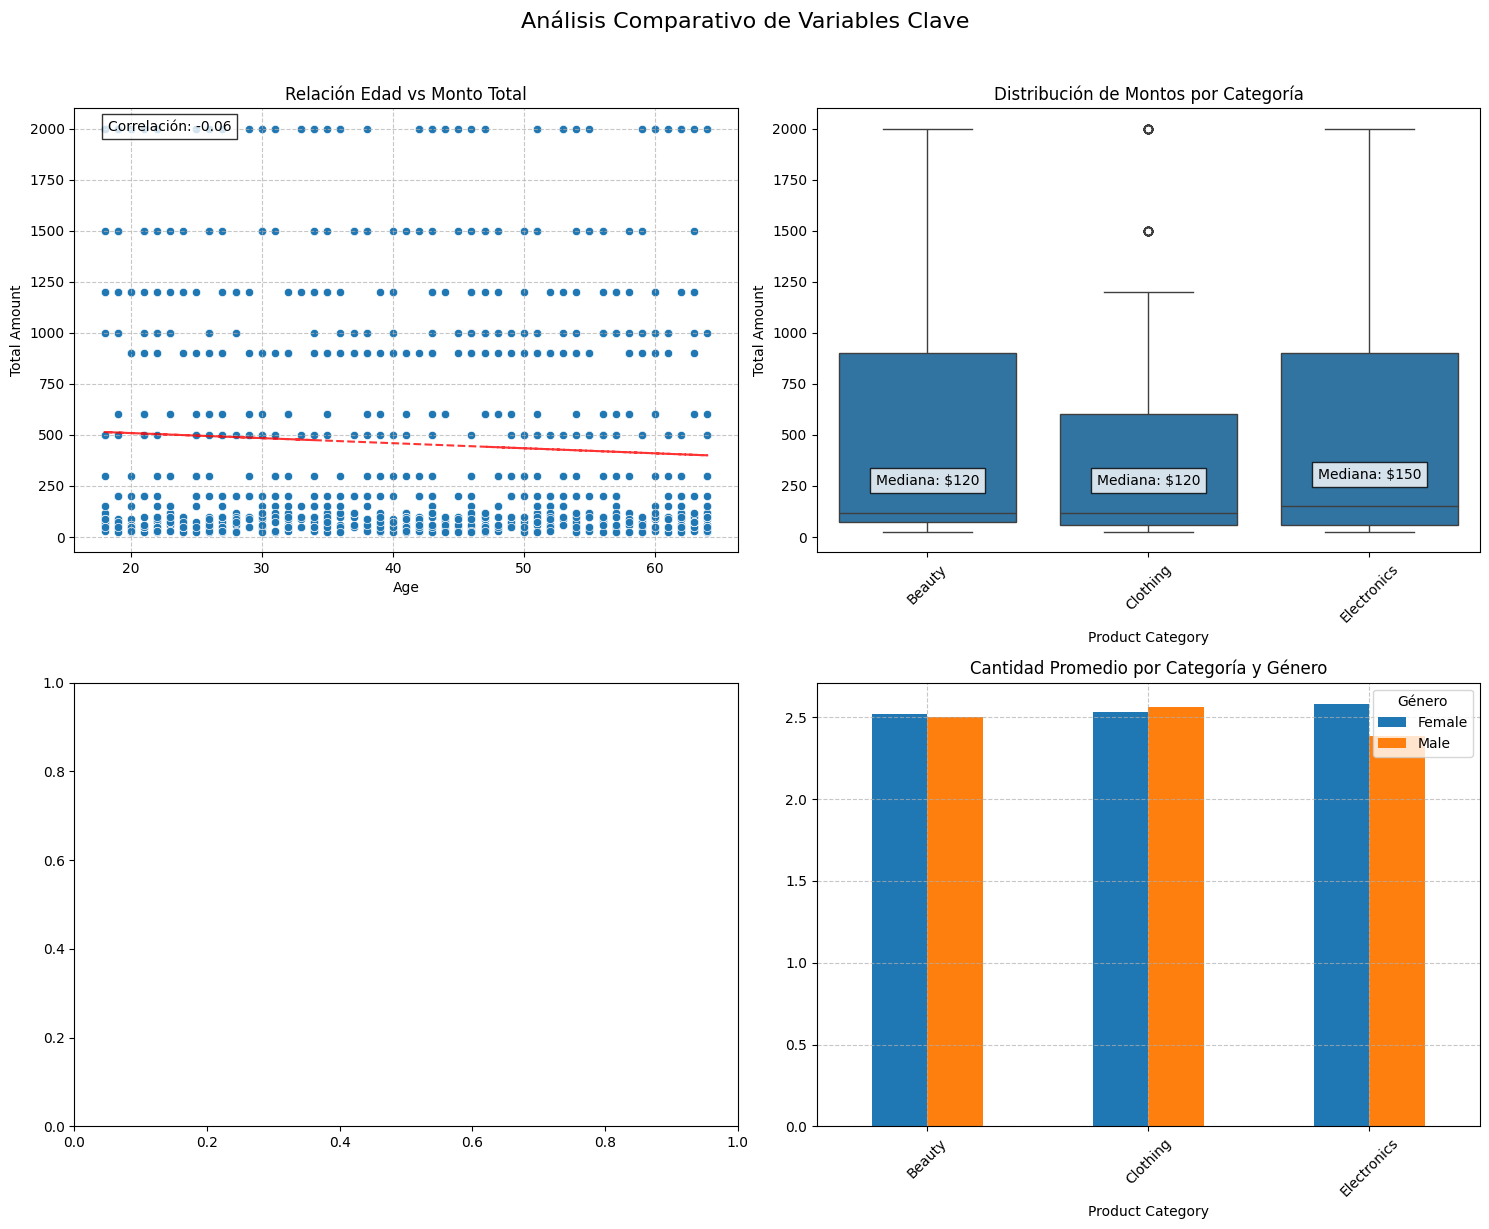

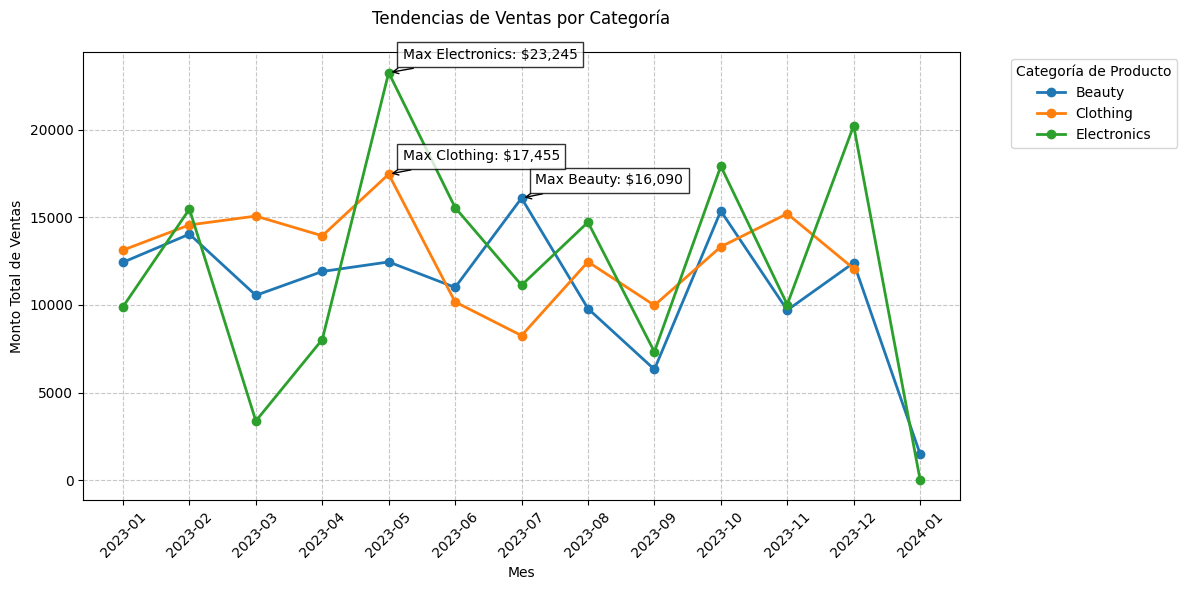

In [20]:

# Asegurar que la fecha está en formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Agregar columna de año-mes para mejor agrupación
df['YearMonth'] = df['Date'].dt.strftime('%Y-%m')

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Análisis Comparativo de Variables Clave', fontsize=16, y=1.02)

# 2.1 Scatter plot: Age vs Total Amount con línea de tendencia
sns.scatterplot(data=df, x='Age', y='Total Amount', ax=axes[0,0])

# Añadir línea de tendencia
x = df['Age']
y = df['Total Amount']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
axes[0,0].plot(x, p(x), "r--", alpha=0.8)

# Añadir anotación con la correlación
corr = df['Age'].corr(df['Total Amount']).round(2)
axes[0,0].annotate(f'Correlación: {corr}', 
                    xy=(0.05, 0.95), 
                    xycoords='axes fraction',
                    bbox=dict(facecolor='white', alpha=0.8))

axes[0,0].set_title('Relación Edad vs Monto Total')
axes[0,0].grid(True, linestyle='--', alpha=0.7)

# 2.2 Box plot: Total Amount por Product Category
sns.boxplot(data=df, x='Product Category', y='Total Amount', ax=axes[0,1])
axes[0,1].set_title('Distribución de Montos por Categoría')
axes[0,1].tick_params(axis='x', rotation=45)

# Añadir anotaciones con estadísticas
for i, category in enumerate(df['Product Category'].unique()):
    median = df[df['Product Category'] == category]['Total Amount'].median()
    axes[0,1].annotate(f'Mediana: ${median:,.0f}', 
                        xy=(i, median),
                        xytext=(0, 20),
                        textcoords='offset points',
                        ha='center',
                        bbox=dict(facecolor='white', alpha=0.8))

# 2.4 Bar plot: Average Quantity por Product Category y Gender
avg_quantity = df.groupby(['Product Category', 'Gender'])['Quantity'].mean().unstack()
avg_quantity.plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Cantidad Promedio por Categoría y Género')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].legend(title='Género')
axes[1,1].grid(True, linestyle='--', alpha=0.7)

# Ajustar layout
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
    
df['Month'] = df['Date'].dt.strftime('%Y-%m')
monthly_sales = df.groupby(['Month', 'Product Category'])['Total Amount'].sum().unstack()

# Crear el gráfico de líneas
for category in monthly_sales.columns:
    plt.plot(range(len(monthly_sales)), monthly_sales[category], 
            marker='o', label=category, linewidth=2)

# Añadir elementos de mejora
plt.title('Tendencias de Ventas por Categoría', pad=20)
plt.xlabel('Mes')
plt.ylabel('Monto Total de Ventas')
plt.xticks(range(len(monthly_sales)), monthly_sales.index, rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Categoría de Producto', bbox_to_anchor=(1.05, 1), loc='upper left')

for category in monthly_sales.columns:
    max_value = monthly_sales[category].max()
    max_index = monthly_sales[category].idxmax()
    plt.annotate(f'Max {category}: ${max_value:,.0f}',
                xy=(monthly_sales.index.get_loc(max_index), max_value),
                xytext=(10, 10), textcoords='offset points',
                bbox=dict(facecolor='white', alpha=0.8),
                arrowprops=dict(arrowstyle='->'))

plt.tight_layout()
plt.show()

* La linea de tendencia del grafico edad vs costo total indica la debil correlacion que tiene la variable edad con el costo total, algo ya visto en el anterior analisis de correlacion
* La dispersion sugiere que la edad es indistinta a la cantidad que gastan los clientes
* Hay algunos valores atípicos en las tres categorias, representados por puntos fuera del rango superior, lo que sugiere que algunos clientes gastan significativamente más que el promedio en estos productos.
* La mediana de la categoria Beauty es ligeramente superior a la de Electronics.
* La cantidad promedio es aproximadamente la misma entre hombres y mujeres para cada categoría, lo que sugiere que no hay una gran diferencia en el número de productos comprados por género.
* En el grafico de tendencias de ventas por meses, observamos de manera curiosa que Clothing y Electronics tuvieron sus picos mas altos el mismo mes (mayo), lo que sugiere que la gente en 2023 tendio a comprar en ambas categorias de manera masiva
* Se ve un considerado repunte en ventas de la seccion electronica desde marzo hasta mayo
* Todas las categorias tienen un punto muy alto y luego de un par de meses un punto muy bajo, lo que sugiere que las altas ventas se dan por temporadas
* La categoria de electronica, es el que mas puntos altos tiene, teniendo dos puntos mas en octubre y diciembre, pero tambien el que tiene el punto mas bajo, pudiendose interpretar que existen temporadas bien marcadas donde esta categoria es mas comprada
* El resto de las categorias sigue un patron similar, aunque con ventas mas bajas, una temporada alta, seguida de al menos una temporada baja
